In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
salaries= pd.read_csv("ds_salaries_clean (1).csv")

In [3]:
salaries.head(5)

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0


In [4]:
#pd.Series.str.replace("charactersto move","characters to replace them with")
#salaries["Salary_In_Rupees"]=salaries["Salaries_In_Rupees"].str.replace(",","")
#print(salary["Salary_In_Rupees"].head())

In [5]:
#converting strings to numbers
#salaries["Salary_In_Rupees"]=salaries["Salary_In_Rupees"].astype(float)
#salaries["Salary_USD"]=salaries["Salary_In_Rupees"]*0.012

In [6]:
salaries["std_dev"]=salaries.groupby("Experience")["Salary_USD"].transform(lambda x:x.std())

In [7]:
salaries["std_dev"]

0      61014.876754
1      55086.264071
2      55086.264071
3      61014.876754
4      55086.264071
           ...     
602    55086.264071
603    55086.264071
604    55086.264071
605    55086.264071
606    61014.876754
Name: std_dev, Length: 607, dtype: float64

In [8]:
salaries.head()

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD,std_dev
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0,61014.876754
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0,55086.264071
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0,55086.264071
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0,61014.876754
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0,55086.264071


In [9]:
print(salaries[["Experience","std_dev"]].value_counts())

Experience  std_dev      
Senior      55086.264071     280
Mid         61014.876754     213
Entry       42390.355189      88
Executive   111783.576779     26
dtype: int64


In [47]:
#Using Duration Dataset
planes=pd.read_csv("planes.csv")

In [48]:
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0


In [49]:
planes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10660 entries, 0 to 10659
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10233 non-null  object 
 1   Date_of_Journey  10338 non-null  object 
 2   Source           10473 non-null  object 
 3   Destination      10313 non-null  object 
 4   Route            10404 non-null  object 
 5   Dep_Time         10400 non-null  object 
 6   Arrival_Time     10466 non-null  object 
 7   Duration         10446 non-null  object 
 8   Total_Stops      10448 non-null  object 
 9   Additional_Info  10071 non-null  object 
 10  Price            10044 non-null  float64
dtypes: float64(1), object(10)
memory usage: 916.2+ KB


In [50]:
planes["Duration"].head(5)

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object

In [14]:
planes["Duration"]=planes["Duration"].astype(str).str.replace("h","")

In [51]:
planes["Duration"]

0            19h
1         5h 25m
2         4h 45m
3         2h 25m
4        15h 30m
          ...   
10655     2h 30m
10656     2h 35m
10657         3h
10658     2h 40m
10659     8h 20m
Name: Duration, Length: 10660, dtype: object

In [52]:
#planes["Duration"]=planes["Duration"].astype(float)


In [53]:
# Price standard deviation by Airline
planes["airline_price_st_dev"] = planes.groupby("Airline")["Price"].transform(lambda x: x.std())

print(planes[["Airline", "airline_price_st_dev"]].value_counts())

Airline            airline_price_st_dev
Jet Airways        4230.748840             3685
IndiGo             2266.753552             1981
Air India          3865.871975             1686
Multiple carriers  3763.674706             1148
SpiceJet           1790.851944              787
Vistara            2864.267802              455
Air Asia           2016.738954              309
GoAir              2790.815129              182
dtype: int64


In [54]:
# Mean Price by Destination
planes["price_destination_mean"] = planes.groupby("Destination")["Price"].transform(lambda x: x.mean())

print(planes[["Destination","price_destination_mean"]].value_counts())

Destination  price_destination_mean
Cochin       10506.993486              4391
Banglore     9132.225153               2773
Delhi        5157.794118               1219
New Delhi    11738.589499               888
Hyderabad    5025.210280                673
Kolkata      4801.489796                369
dtype: int64


# Handling Outliers

In [55]:
print(salaries["Salary_USD"].describe())

count       607.000000
mean     107225.836903
std       67752.393254
min        2730.000000
25%       59893.000000
50%       96982.000000
75%      143225.000000
max      572900.000000
Name: Salary_USD, dtype: float64


In [56]:
#Using   interquartile range(IQR)
seventy_fifth_percentile=salaries["Salary_USD"].quantile(0.75)
twenty_fifth_percentile=salaries["Salary_USD"].quantile(0.25)
print(seventy_fifth_percentile)
print(twenty_fifth_percentile)
iqr=seventy_fifth_percentile-twenty_fifth_percentile
print(iqr)

143225.0
59893.0
83332.0


In [57]:
upper_outlier=seventy_fifth_percentile+(1.5*iqr)
lower_outlier=twenty_fifth_percentile-(1.5*iqr)
print(upper_outlier)
print(lower_outlier)

268223.0
-65105.0


In [58]:
#Subsetting data to show the outliers
salaries[(salaries["Salary_USD"]<lower_outlier) | (salaries["Salary_USD"]>upper_outlier) ][["Experience","Employee_Location","Salary_USD"]]

,Experience,Employee_Location,Salary_USD
25,Executive,US,310321.0
33,Mid,US,429675.0
63,Senior,US,393392.0
97,Mid,US,429675.0
157,Mid,US,403895.0
225,Executive,US,397211.0
252,Executive,US,572900.0
482,Executive,US,309366.0
519,Senior,US,362837.0
523,Senior,US,386708.0


In [59]:
no_outliers=salaries[(salaries["Salary_USD"]>lower_outlier)&(salaries["Salary_USD"]<upper_outlier)]

In [60]:
no_outliers

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD,std_dev
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0,61014.876754
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0,55086.264071
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0,55086.264071
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0,61014.876754
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0,55086.264071
...,...,...,...,...,...,...,...,...,...
602,2022,Data Engineer,Senior,FT,US,M,100,147044.0,55086.264071
603,2022,Data Engineer,Senior,FT,US,M,100,120309.0,55086.264071
604,2022,Data Analyst,Senior,FT,US,M,0,123174.0,55086.264071
605,2022,Data Analyst,Senior,FT,US,M,100,143225.0,55086.264071


In [61]:
print(no_outliers["Salary_USD"].describe())

count       597.000000
mean     102328.480737
std       55910.790653
min        2730.000000
25%       59819.000000
50%       95483.000000
75%      141565.000000
max      263534.000000
Name: Salary_USD, dtype: float64


<Axes: xlabel='Salary_USD', ylabel='Count'>

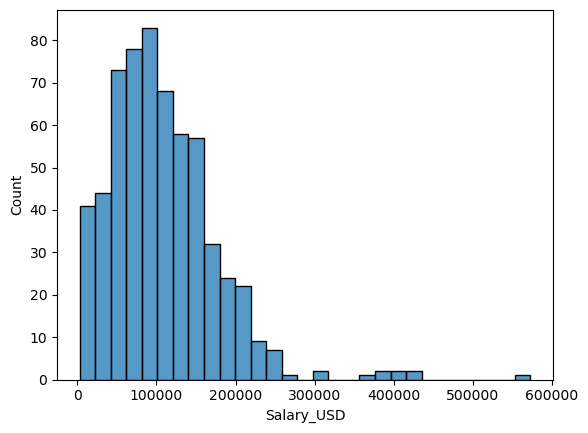

In [62]:
sns.histplot(data=salaries,x="Salary_USD")

In [63]:
# Find the 75th and 25th percentiles
price_seventy_fifth = planes["Price"].quantile(0.75)
price_twenty_fifth = planes["Price"].quantile(0.25)

# Calculate iqr
prices_iqr = price_seventy_fifth - price_twenty_fifth

# Calculate the thresholds
upper = price_seventy_fifth + (1.5 * prices_iqr)
lower = price_twenty_fifth - (1.5 * prices_iqr)

# Subset the data
planes = planes[(planes["Price"] >lower) & (planes["Price"] < upper)]

print(planes["Price"].describe())

count     9959.000000
mean      8875.160860
std       4057.202002
min       1759.000000
25%       5228.000000
50%       8283.000000
75%      12284.000000
max      23001.000000
Name: Price, dtype: float64


,Duration
0,5 25m
1,3 40m
2,7 15m
3,2 30m
